In this section, we will look at what Transformer models can do and use our first tool from the 🤗 Transformers library: the pipeline() function.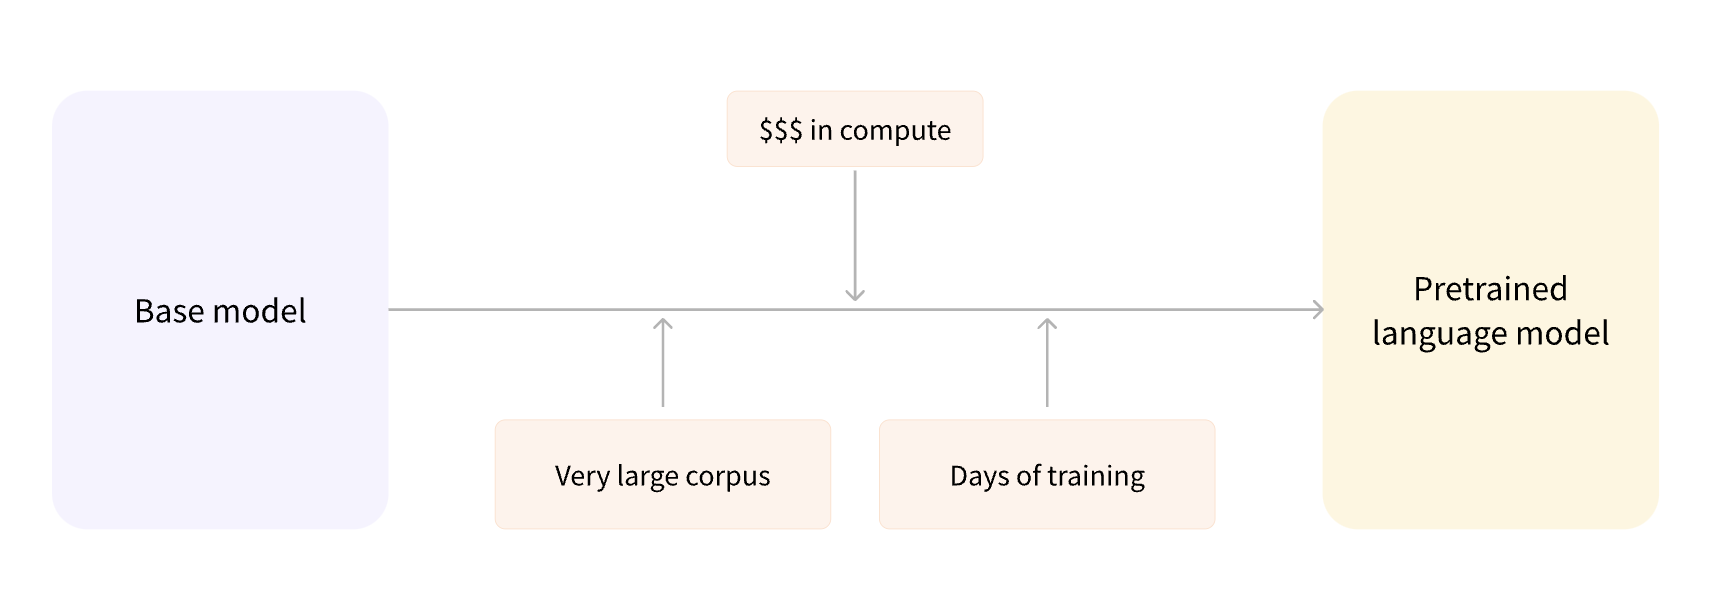

The 🤗 Transformers library provides the functionality to create and use those shared models. The Model Hub contains thousands of pretrained models that anyone can download and use. You can also upload your own models to the Hub!

The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

In the below code we are importing sentimenta-analysis pipeline.because we are performing sentiment analysis.

so ,we need select pipeline according to our tasks.

pipelines are created basically to do specific task and we cannot alter the functionality

In [ ]:
from transformers import pipeline
classifier=pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

In [ ]:
from transformers import pipeline
classifier=pipeline("sentiment-analysis")
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

There are three main steps involved when you pass some text to a pipeline:

The text is preprocessed into a format the model can understand.

The preprocessed inputs are passed to the model.

The predictions of the model are post-processed, so you can make sense of them.

Some of the currently available pipelines are:

feature-extraction (get the vector representation of a text)

fill-mask

ner (named entity recognition)

question-answering

sentiment-analysis

summarization

text-generation

translation

zero-shot-classification

In [ ]:
from transformers import pipeline
classifier=pipeline("summarization" ,max_length=142)
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 142, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 142, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


[{'summary_text': ' "I\'ve been waiting for a HuggingFace course my whole life. I\'ve been . waiting for this whole life," she said . She said she was "delighted" with the idea of Hugging Face . She added that she had been waiting to see the course for a whole life .'},
 {'summary_text': " I hate this so much. I hate it so much! This is the first time I've seen this kind of video in a long-term relationship with someone else . I'm so sad about this, I'm not so happy about it, but I'm very sad about it ."}]

We’ll start by tackling a more challenging task where we need to classify texts that haven’t been labelled. This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model. You’ve already seen how the model can classify a sentence as positive or negative using those two labels — but it can also classify the text using any other set of labels you like.

zero shot classification by me.

if we want to label data according to our needs we need to use zero shot classification pipeline and provide custom labels as shown below.so we dont need rely on labels of pretrained models

In [ ]:
from transformers import pipeline
ZeroShotClassificationPipeline=pipeline("zero-shot-classification")
ZeroShotClassificationPipeline(
    "i am shashank reddy lakkam",
    candidate_labels=["name","business","politics"]
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'i am shashank reddy lakkam',
 'labels': ['name', 'business', 'politics'],
 'scores': [0.9846277236938477, 0.008706733584403992, 0.0066655706614255905]}

text generation pipeline

In [ ]:
from transformers import pipeline
textgeneration=pipeline("text-generation")
textgeneration("fight club movie is")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'fight club movie is to have the first three to spend the whole film.\n\nThe movie is set to be released on May 21.'}]

You can control how many different sequences are generated with the argument num_return_sequences and the total length of the output text with the argument max_length.

In [ ]:
from transformers import pipeline
textgeneration=pipeline("text-generation")
textgeneration("fight club movie is",
               max_length=20,
               num_return_sequences=2,)

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'fight club movie is set in the same city, but with the same locations. As an example,'},
 {'generated_text': 'fight club movie is about a group of boys who come together to escape all of their own troubles.'}]

until now we used default model for pipeline now we will use a model

In [ ]:
from transformers import pipeline
textgeneration=pipeline("text-generation", model="Helsinki-NLP/opus-mt-en-zh")
textgeneration("fight club movie is",
               max_length=20,
               num_return_sequences=2,)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/806k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'generated_text': 'fight club movie is數頭頭頭頭頭頭頭頭頭頭頭頭頭頭'},
 {'generated_text': 'fight club movie is數頭頭頭頭頭頭頭頭頭頭頭頭頭原住民'}]

mask fill pipeline

In [ ]:
from transformers import pipeline
maskfilling=pipeline("fill-mask")
maskfilling("this course will teach you <mask>",top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.07614003121852875,
  'token': 328,
  'token_str': '!',
  'sequence': 'this course will teach you!'},
 {'score': 0.06997144222259521,
  'token': 55,
  'token_str': ' more',
  'sequence': 'this course will teach you more'}]

The top_k argument controls how many possibilities you want to be displayed. Note that here the model fills in the special <mask> word, which is often referred to as a mask token. Other mask-filling models might have different mask tokens, so it’s always good to verify the proper mask word when exploring other models. One way to check it is by looking at the mask word used in the widget.

ner pipeline

name entity recognition pipeline() it is used to find persons, locations, or organizations.

In [ ]:
from transformers import pipeline
nem = pipeline("ner", grouped_entities=True)
nem("i am shashank lives in toronto canada")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[]

question answering pipeline

Note that this pipeline works by extracting information from the provided context; it does not generate the answer.

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.6949766278266907, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

summarization pipeline

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

Translator pipeline

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'This course is produced by Hugging Face.'}]

Transformer models. Broadly, they can be grouped into three categories:

GPT-like (also called auto-regressive Transformer models)

BERT-like (also called auto-encoding Transformer models)

BART/T5-like (also called sequence-to-sequence Transformer models)

All the Transformer models mentioned above (GPT, BERT, BART, T5, etc.) have been trained as language models. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called transfer learning. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task

An example of a task is predicting the next word in a sentence having read the n previous words. This is called "causal language modeling" because the output depends on the past and present inputs, but not the future ones.

Another example is "masked language modeling", in which the model predicts a masked word in the sentence. which can be achieved by using mask pipeline

Transfer Learning

Pretraining is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.

This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

Fine-tuning, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Wait — why not simply train the model for your final use case from the start (scratch)? There are a couple of reasons:

The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
For the same reason, the amount of time and resources needed to get good results are much lower.
For example, one could leverage a pretrained model trained on the English language and then fine-tune it on an arXiv corpus, resulting in a science/research-based model. The fine-tuning will only require a limited amount of data: the knowledge the pretrained model has acquired is “transferred,” hence the term transfer learning.

General architecture of Transformer

transformer architecture consists of two blocks

encoder
========

The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.

decoder
========
The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.

Encoder-only models: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.

Decoder-only models: Good for generative tasks such as text generation.

Encoder-decoder models or sequence-to-sequence models: Good for generative tasks that require an input, such as translation or summarization

ATTENTION LAYERS
=================

A key feature of Transformer models is that they are built with special layers called attention layers. In fact, the title of the paper introducing the Transformer architecture was “Attention Is All You Need”! We will explore the details of attention layers later in the course; for now, all you need to know is that this layer will tell the model to pay specific attention to certain words in the sentence you passed it (and more or less ignore the others) when dealing with the representation of each word.

The Original Architecture:
==========================

Architectures vs. checkpoints

As we dive into Transformer models in this course, you’ll see mentions of architectures and checkpoints as well as models. These terms all have slightly different meanings:

Architecture: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.

Checkpoints: These are the weights that will be loaded in a given architecture.

Model: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both. This course will specify architecture or checkpoint when it matters to reduce ambiguity.

Self-Attention Mechanism:
==========================
 This is the core component of the encoder. Self-attention allows each token in the sequence to attend to all other tokens, capturing dependencies between them. It computes attention scores between all pairs of tokens and then combines the values (embeddings) according to these scores. This step is repeated multiple times in parallel (multi-head attention) to capture different aspects of the relationships between tokens.

encoders:
=========
encoders have self attention mechanism which will take the bidirectional context values and assign the value to current word.

decoders:
===========
decoders are unidirectional means they have masked self attention mechanism means it will take context from previous words .

for example if we are predicting 3 rd word it will take context from 1st and 2 nd words

the input for decode model is "my" the model will map "my"(here input to decoder) with all known words(head in architecture) and finds the best suited  following word.

now to predic the next word we will use input as "my name" (again the model will check all known words and finds the best suited word).

this process of giving output as input to model is called auto regression.